# Optimized Model

Load the dataset

In [ ]:
import pandas as pd

df = pd.read_csv("data/pima-indians-diabetes.csv")
dataset = df.values

Split the dataset into features (x) and labels (y)

In [92]:
X = dataset[:,0:8]
y = dataset[:,8]

Split the dataset into training and testing sets

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (614, 8)
y_train shape: (614,)
X_test shape: (154, 8)
y_test shape: (154,)


Standardize the features

In [94]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Initialize the model with optimum hyperparameters

In [95]:
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(keras.Input(shape=(X_train.shape[1],)))
model.add(Dense(units=16, activation='relu', kernel_regularizer='l1'))
model.add(Dropout(0.1))
model.add(Dense(units=16, activation='relu', kernel_regularizer='l1'))
model.add(Dense(units=8, activation='relu', kernel_regularizer='l1'))
model.add(Dense(units=1, activation='sigmoid'))

# Specify the optimizer
optimizer = Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

Create early stopping instance

In [96]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)

Fit the model

In [97]:
history = model.fit(X_train, y_train, epochs=10000, batch_size=16, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/10000
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3470 - loss: 1.9057 - val_accuracy: 0.5161 - val_loss: 1.7481
Epoch 2/10000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5977 - loss: 1.7249 - val_accuracy: 0.7097 - val_loss: 1.6167
Epoch 3/10000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7075 - loss: 1.5803 - val_accuracy: 0.6935 - val_loss: 1.4936
Epoch 4/10000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7066 - loss: 1.4559 - val_accuracy: 0.7419 - val_loss: 1.3747
Epoch 5/10000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7278 - loss: 1.3274 - val_accuracy: 0.7581 - val_loss: 1.2633
Epoch 6/10000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7437 - loss: 1.2146 - val_accuracy: 0.7581 - val_loss: 1.1622
Epoch 7/10000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7308 - loss: 1.1116 - val_accuracy: 0.6935 - val_loss: 1.0657
Epoch 8/10000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7444 - loss: 1.0178 - val_accu

Evaluate the model

In [98]:
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7437 - loss: 0.5539
Test loss: 0.5450234413146973
Test accuracy: 0.7597402334213257


Plot the training & validation loss

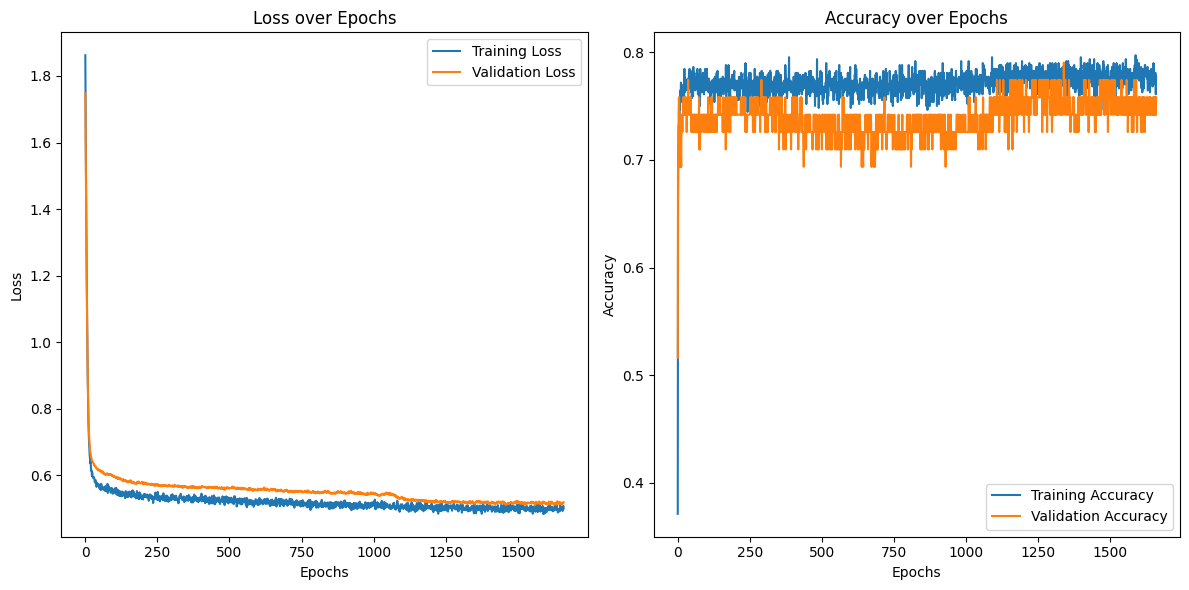

In [99]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Save the model

In [101]:
# Save the model
model.save('models/optimized.keras')